In [2]:
import pandas as pd
import numpy as np
import ast

In [3]:
def readDataframe(csv_file):
    df = pd.read_csv(csv_file)
    try:
        df.drop(columns=['Unnamed: 0'],inplace=True)
    except:
        pass

    for column in df.columns:
        def safe_literal_eval(x):
            if isinstance(x, str) and pd.notna(x):
                try:    
                    return ast.literal_eval(x) if pd.notna(x) else x
                except (ValueError, SyntaxError):
                    return x  # Return empty list for problematic entries
            return x  # Return empty list for None or non-string entries
        df[column] = df[column].apply(safe_literal_eval)
    return df

In [4]:
df = readDataframe('../../Data/videos_dataset.csv')

In [5]:
median_impressions = df['Ad ID'].value_counts().median()
print(f"median: {median_impressions:.0f} impressions per ad")


median: 2 impressions per ad


## The Results in this notebook focus on using the entire dataset for advertiser analysis. We obtain the same trends as the sample, providing robustness to our methodology

In [11]:
df['Country'] = df['Country'].replace({
    'Turkey':'Türkiye',
    'UAE':'United Arab Emirates'
})

quartiles = {
    'Quartile A': ['Sweden', 'Germany', 'Spain', 'United States', 'Taiwan', 'South Korea', 'Singapore'],
    'Quartile B': ['United Arab Emirates', 'France', 'Ireland', 'Mexico', 'Belgium', 'Turkey', 'Vietnam', 'Pakistan'],
    'Quartile C': ['Lithuania', 'Estonia', 'Netherlands', 'Austria', 'Latvia', 'Bahrain', 'Morocco', 'Lebanon'],
    'Quartile D': ['Bulgaria', 'Jordan', 'Bangladesh', 'Ghana', 'Senegal', 'Algeria','Sri Lanka']
}
country_to_quartile = {country: q for q, countries in quartiles.items() for country in countries}

df['Quartile'] = df['Country'].map(country_to_quartile)


# df['Country'] = df['Country'].str.lower()
# df['Advertiser Location'] = df['Advertiser Location'].str.lower()
df['Native Advertiser'] = df.apply(lambda x: x['Advertiser Location'] == x['Country'], axis=1)
df

,Main Video Details,Main Video ID,Country,Video Ads,Ad ID,Skippable,SkipDuration,Advertiser Name,Advertiser Location,Verified,ad_id_clean,main_id_clean,Quartile,Native Advertiser
0,{'Url': 'https://www.youtube.com/watch?v=BNU29...,BNU29yZiFnU,Lithuania,"{'ad_id': '63KMxWZp7ro ', 'Count': 1, 'Skippab...",63KMxWZp7ro,0,0:15,UAB Švarista,Lithuania,True,63KMxWZp7ro,BNU29yZiFnU,Quartile C,True
1,{'Url': 'https://www.youtube.com/watch?v=s4qH_...,s4qH_e7tKA8,Lithuania,"{'ad_id': 'K3alsAJnlp4 ', 'Count': 1, 'Skippab...",K3alsAJnlp4,1,0:15,UAB Paskolų tarpininkai,Lithuania,True,K3alsAJnlp4,s4qH_e7tKA8,Quartile C,True
2,{'Url': 'https://www.youtube.com/watch?v=pNWAx...,pNWAxKY1cbc,Lithuania,"{'ad_id': 'Iatab896dQI ', 'Count': 1, 'Skippab...",Iatab896dQI,1,0:15,UAB Švarista,Lithuania,True,Iatab896dQI,pNWAxKY1cbc,Quartile C,True
3,{'Url': 'https://www.youtube.com/watch?v=G9H2a...,G9H2aliqkq8,Lithuania,"{'ad_id': '63KMxWZp7ro ', 'Count': 1, 'Skippab...",63KMxWZp7ro,1,0:15,UAB Švarista,Lithuania,True,63KMxWZp7ro,G9H2aliqkq8,Quartile C,True
4,{'Url': 'https://www.youtube.com/watch?v=nBANl...,nBANlLaki_Y,Lithuania,"{'ad_id': 'KROhwzOlUD8 ', 'Count': 1, 'Skippab...",KROhwzOlUD8,1,NaN,"Telia Lietuva, AB",Lithuania,True,KROhwzOlUD8,nBANlLaki_Y,Quartile C,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22761,{'Url': 'https://www.youtube.com/watch?v=Rxpyu...,Rxpyuc6F_94,France,"{'ad_id': 'C2iiYwP8XyE ', 'Count': 1, 'Skippab...",C2iiYwP8XyE,1,1:20,Renault S.A.S,France,False,C2iiYwP8XyE,Rxpyuc6F_94,Quartile B,True
22762,{'Url': 'https://www.youtube.com/watch?v=Fx3GN...,Fx3GNMqidUQ,France,"{'ad_id': 'CoFtuc7vMf0 ', 'Count': 1, 'Skippab...",CoFtuc7vMf0,1,0:12,Dyson,France,True,CoFtuc7vMf0,Fx3GNMqidUQ,Quartile B,True
22763,{'Url': 'https://www.youtube.com/watch?v=dqOx8...,dqOx8G7Yjxg,France,"{'ad_id': 'mUnAtkwNFtY ', 'Count': 1, 'Skippab...",mUnAtkwNFtY,0,NaN,Publicis DMX BV,Netherlands,False,mUnAtkwNFtY,dqOx8G7Yjxg,Quartile B,False
22764,{'Url': 'https://www.youtube.com/watch?v=LGYrG...,LGYrGRAkurc,France,"{'ad_id': 'NRUuR9qRI5U ', 'Count': 1, 'Skippab...",NRUuR9qRI5U,1,0:20,Smyths Toys HQ Unlimited Company,Ireland,True,NRUuR9qRI5U,LGYrGRAkurc,Quartile B,False


In [10]:
df[['Advertiser Name','Advertiser Location']].drop_duplicates()    

,Advertiser Name,Advertiser Location
0,UAB Švarista,Lithuania
1,UAB Paskolų tarpininkai,Lithuania
4,"Telia Lietuva, AB",Lithuania
5,Noota,France
6,BNM Finance UAB,Lithuania
...,...,...
22741,NV GALLERY,France
22746,"Beggars Banquet Recordings (USA), Inc",United States
22752,"McKinsey & Company, Inc., United States",United States
22753,Pixartprinting SpA,Italy


In [11]:
df[['Advertiser Name', 'Advertiser Location']].drop_duplicates()    

,Advertiser Name,Advertiser Location
0,UAB Švarista,Lithuania
1,UAB Paskolų tarpininkai,Lithuania
4,"Telia Lietuva, AB",Lithuania
5,Noota,France
6,BNM Finance UAB,Lithuania
...,...,...
22741,NV GALLERY,France
22746,"Beggars Banquet Recordings (USA), Inc",United States
22752,"McKinsey & Company, Inc., United States",United States
22753,Pixartprinting SpA,Italy


Figure saved to combined_advertiser_analysis_full.pdf


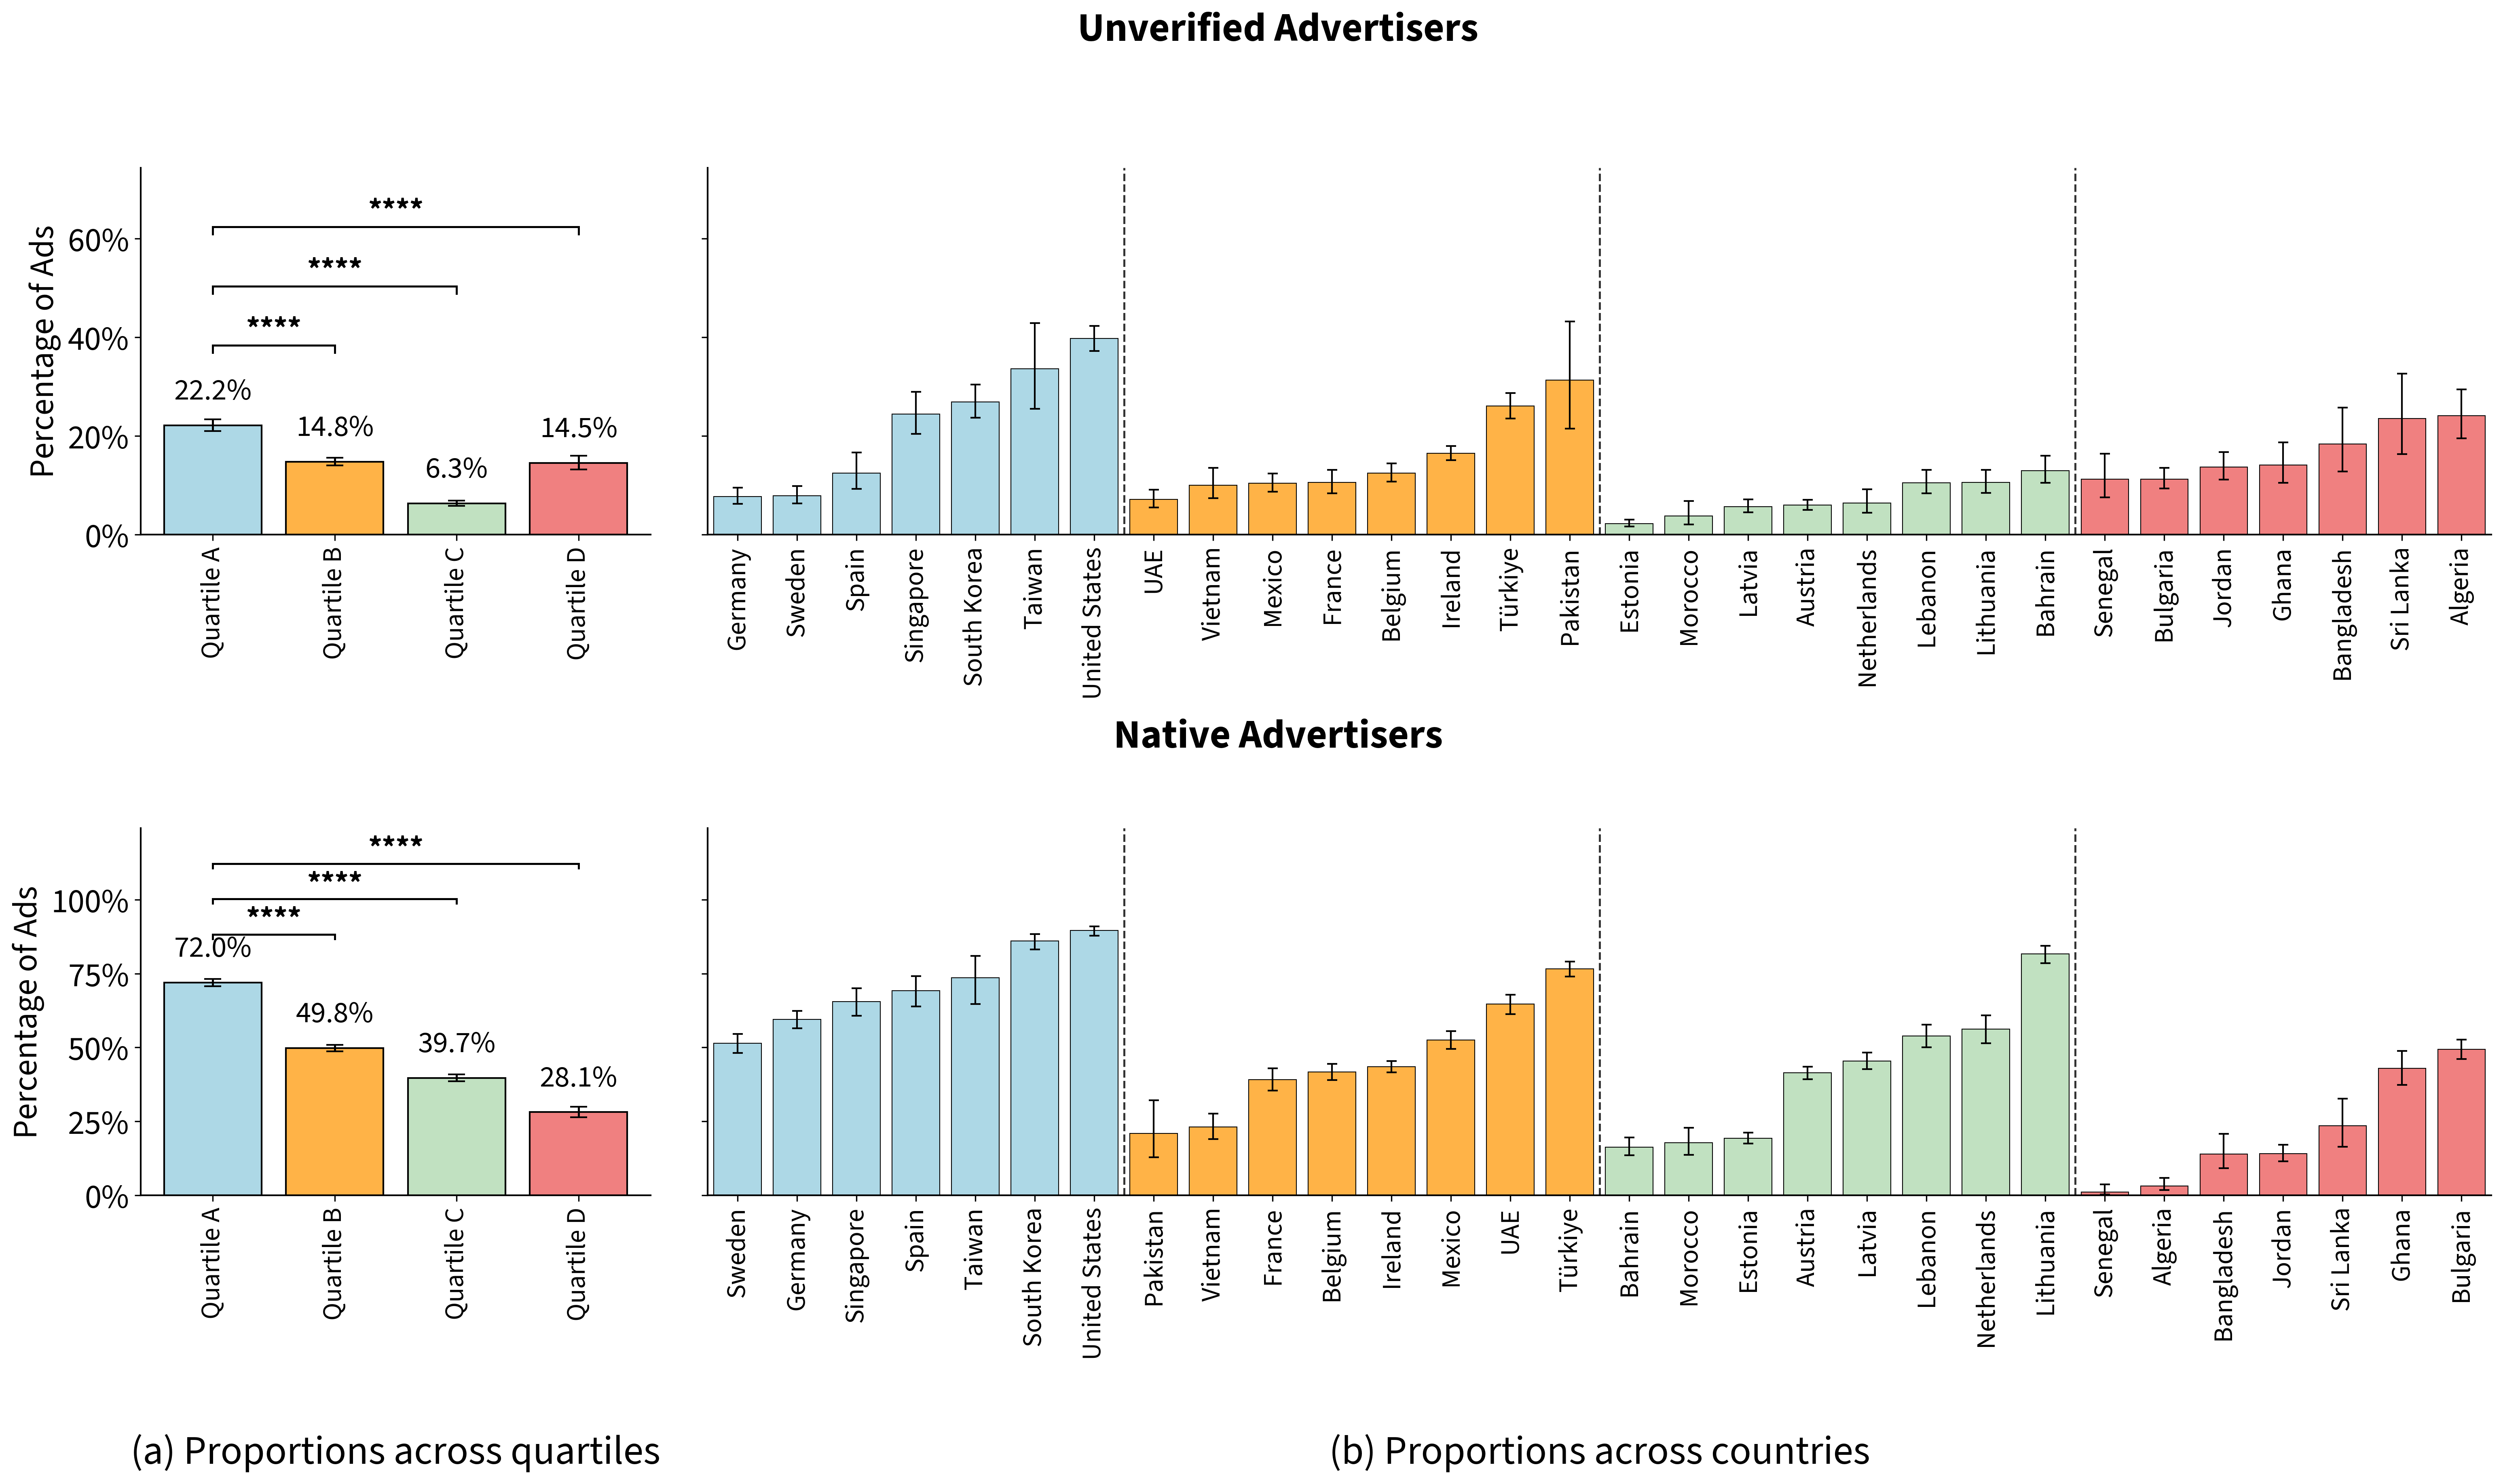

In [12]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from statsmodels.stats.proportion import proportion_confint, proportions_ztest
import matplotlib.gridspec as gridspec

# Helper function to draw significance brackets
def draw_sig_bracket(ax, x_start, x_end, y_level, text, tick_height=1.5):
    """Draws a significance bracket between two points on the plot."""
    ax.plot([x_start, x_end], [y_level, y_level], color='black', lw=1.2)
    ax.plot([x_start, x_start], [y_level, y_level - tick_height], color='black', lw=1.2)
    ax.plot([x_end, x_end], [y_level, y_level - tick_height], color='black', lw=1.2)
    ax.text((x_start + x_end) / 2., y_level + 0.5, text, ha='center', va='bottom', fontsize=18, fontweight='bold')

def plot_combined_advertiser_analysis(df: pd.DataFrame, save_path=None):
    """
    Generates a single figure with two vertically stacked panels for 'Unverified'
    and 'Native' advertiser metrics, each showing quartile and country-level data.
    """
    # Create the main figure.
    fig = plt.figure(figsize=(25, 11))
    
    # hspace provides vertical spacing between the two rows of plots.
    outer_grid = gridspec.GridSpec(2, 1, figure=fig, hspace=0.8)

    quartiles = {
        'Quartile A': ['Singapore', 'Taiwan', 'South Korea', 'Germany', 'Spain', 'Sweden', 'United States'],
        'Quartile B': ['United Arab Emirates', 'France', 'Belgium', 'Vietnam', 'Ireland', 'Mexico', 'Türkiye', 'Pakistan'],
        'Quartile C': ['Bahrain', 'Lebanon', 'Lithuania', 'Latvia', 'Netherlands', 'Austria', 'Estonia', 'Morocco'],
        'Quartile D': ['Bulgaria', 'Algeria', 'Jordan', 'Sri Lanka', 'Bangladesh', 'Senegal', 'Ghana']
    }
    country_to_quartile = {country: q for q, countries in quartiles.items() for country in countries}
    quartile_order = ['Quartile A', 'Quartile B', 'Quartile C', 'Quartile D']
    quartile_colors = {'Quartile A': '#add8e6', 'Quartile B': '#ffb347', 'Quartile C': '#c1e1c1', 'Quartile D': '#f08080'}

    bottom_axes = []

    # Define the two analyses to perform in the loop
    analyses = [
        {'column': 'Verified', 'title': 'Unverified Advertisers', 'invert': True},
        {'column': 'Native Advertiser', 'title': 'Native Advertisers', 'invert': False}
    ]

    for i, analysis_params in enumerate(analyses):
        # --- 1. Data Preparation ---
        df['Quartile'] = df['Country'].map(country_to_quartile)
        df_filtered = df.dropna(subset=['Quartile']).copy()

        # Use the logic from plot_quartile_metric to define the target for analysis
        if analysis_params['invert']:
            df_filtered['is_target'] = (~df_filtered[analysis_params['column']]).astype(int)
        else:
            df_filtered['is_target'] = df_filtered[analysis_params['column']].astype(int)

        # Country-level summary
        country_summary = df_filtered.groupby('Country').agg(Total_Ads=('Ad ID', 'count'), Target_Ads=('is_target', 'sum')).reset_index()
        country_summary['Percentage'] = (country_summary['Target_Ads'] / country_summary['Total_Ads']) * 100
        country_summary['Quartile'] = country_summary['Country'].map(country_to_quartile)
        ci_low_country, ci_high_country = proportion_confint(country_summary['Target_Ads'], country_summary['Total_Ads'], method='wilson')
        country_summary['y_err_lower'] = country_summary['Percentage'] - ci_low_country * 100
        country_summary['y_err_upper'] = ci_high_country * 100 - country_summary['Percentage']
        country_summary['Quartile'] = pd.Categorical(country_summary['Quartile'], categories=quartile_order, ordered=True)
        country_summary = country_summary.sort_values(by=['Quartile', 'Percentage'], ascending=[True, True]).reset_index(drop=True)

        # Quartile-level summary
        quartile_summary = df_filtered.groupby('Quartile').agg(Total_Ads=('Ad ID', 'count'), Target_Ads=('is_target', 'sum')).reindex(quartile_order)
        quartile_summary['Percentage'] = (quartile_summary['Target_Ads'] / quartile_summary['Total_Ads']) * 100
        ci_low_q, ci_high_q = proportion_confint(quartile_summary['Target_Ads'], quartile_summary['Total_Ads'], method='wilson')
        y_err_q = [quartile_summary['Percentage'] - ci_low_q * 100, ci_high_q * 100 - quartile_summary['Percentage']]

        # --- 2. Create a nested GridSpec ---
        inner_grid = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=outer_grid[i], width_ratios=[1, 3.5], wspace=0.05)
        ax1 = fig.add_subplot(inner_grid[0]) # Quartile plot
        ax2 = fig.add_subplot(inner_grid[1], sharey=ax1) # Country plot

        if i == 1:
             bottom_axes.extend([ax1, ax2])

        # Add a single title for the entire row
        row_y_pos = 0.97 if i == 0 else 0.44
        fig.text(0.5, row_y_pos, analysis_params['title'], ha='center', va='bottom', fontsize=24, fontweight='bold')

        # --- 3. Plotting ---
        # Left Plot: Per-Quartile
        ax1.bar(quartile_summary.index, quartile_summary['Percentage'], yerr=y_err_q, color=[quartile_colors[q] for q in quartile_order], edgecolor='black', error_kw=dict(ecolor='black', lw=1.2, capsize=5))
        
        for p in ax1.patches:
            height = p.get_height()
            ax1.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 20), textcoords='offset points', fontsize=18)
        
        ax1.set_ylabel("Percentage of Ads")
        ax1.tick_params(axis='x', rotation=90, labelsize=16)
        ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}%'))
        ax1.grid(False)

        # Add statistical significance brackets
        max_h = (quartile_summary['Percentage'] + pd.Series(y_err_q[1], index=quartile_summary.index)).max()
        y_start = max_h + 15
        y_increment = 12
        
        comparisons = [('Quartile A', 'Quartile B'), ('Quartile A', 'Quartile C'), ('Quartile A', 'Quartile D')]
        quartile_x_pos = {q: i for i, q in enumerate(quartile_order)}
        
        for ref_q, comp_q in comparisons:
            if ref_q not in quartile_summary.index or comp_q not in quartile_summary.index: continue
            
            ref_counts = quartile_summary.loc[ref_q]
            comp_counts = quartile_summary.loc[comp_q]

            stat, pval = proportions_ztest([ref_counts['Target_Ads'], comp_counts['Total_Ads']],
                                           [ref_counts['Total_Ads'], comp_counts['Total_Ads']])

            if pval < 0.0001: sig_text = '****'
            elif pval < 0.001: sig_text = '***'
            elif pval < 0.01: sig_text = '**'
            elif pval < 0.05: sig_text = '*'
            else: continue

            draw_sig_bracket(ax1, quartile_x_pos[ref_q], quartile_x_pos[comp_q], y_start, sig_text)
            y_start += y_increment
            
        ax1.set_ylim(top=y_start)

        # Right Plot: Per-Country
        country_palette_list = country_summary['Quartile'].map(quartile_colors).tolist()
        country_summary['Country'] = country_summary['Country'].str.replace('United Arab Emirates', 'UAE')

        ax2.bar(country_summary['Country'], country_summary['Percentage'], color=country_palette_list, edgecolor='black', linewidth=0.5)
        ax2.errorbar(x=np.arange(len(country_summary)), y=country_summary['Percentage'], yerr=[country_summary['y_err_lower'], country_summary['y_err_upper']], fmt='none', ecolor='black', capsize=3, lw=1)
        
        ax2.tick_params(axis='x', rotation=90, labelsize=16)
        plt.setp(ax2.get_yticklabels(), visible=False)
        ax2.grid(False)
        
        q_values = country_summary['Quartile'].values
        change_indices = np.flatnonzero(q_values[:-1] != q_values[1:])
        for idx in change_indices:
            ax2.axvline(x=idx + 0.5, color='black', linestyle='--', linewidth=1.2, alpha=0.8)
        
        ax2.set_xlim(-0.5, len(country_summary) - 0.5)

    # --- Final Touches ---
    bottom_axes[0].text(0.5, -0.65, '(a) Proportions across quartiles', ha='center', va='top', transform=bottom_axes[0].transAxes, fontsize=24)
    bottom_axes[1].text(0.5, -0.65, '(b) Proportions across countries', ha='center', va='top', transform=bottom_axes[1].transAxes, fontsize=24)

    if save_path:
        fig.savefig(save_path, bbox_inches='tight', transparent=False)
        print(f"Figure saved to {save_path}")

    plt.show()

df['Country'] = df['Country'].replace({'Turkey':'Türkiye', 'UAE':'United Arab Emirates'})
df['Native Advertiser'] = df.apply(lambda x: x['Advertiser Location'] == x['Country'], axis=1)


# --- Generate the combined plot ---
plot_combined_advertiser_analysis(
    df=df,
    save_path='combined_advertiser_analysis_full.pdf'
)